In [1]:
# Advances in data mining
# Assignment 0
# by Liurong Lin and Matthijs van Groeningen

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Find the number of unique values by drawing n values from an (0, N] range
def number_of_unique_values(N, n):
    numlist = np.random.randint(0, N, n)
    repeat = len(np.unique(numlist))
    return repeat

# Fomula for Unique Value

If we generate n random integers between (0,N], the number of unique values is expected to follow the fomula below.

$z=N(1-(1-\frac{1}{N})^{n})$

For each event, a certain integer has the possibility of $(1-\frac{1}{N})$ for not being chosen. If we process n events, then the probability of a certain number not to be selected is $(1-\frac{1}{N})^{n}$. In other words, the probability for a certain integer to be chosen during the n events would be $(1-(1-\frac{1}{N})^{n})$. Because we have N intergers in total to choose from, the number of unique values being chosen among these n events will be $N(1-(1-\frac{1}{N})^{n})$.

In [3]:
def theoretical_number_of_unique_values(N, n):
    return N * (1 - (1 - 1 / N)**n)

# Distribution for a single N, n pair

In [4]:
np.random.seed(1)

def experiment_0(N, n, num_trial):
    unique_values = []
    for i in range(num_trial):
        val = number_of_unique_values(N, n)
        unique_values.append(val)
    return np.array(unique_values)

N = 100
n = 60
trails = 10000

values = experiment_0(N, n, trails)
exp_unique_value = theoretical_number_of_unique_values(N, n)
mean_values = np.mean(values)

bins = list(set(values))

print('Mean unique values: ', mean_values)
print('Expected unique values: ', exp_unique_value)

Mean unique values:  45.2601
Expected unique values:  45.28433576092388


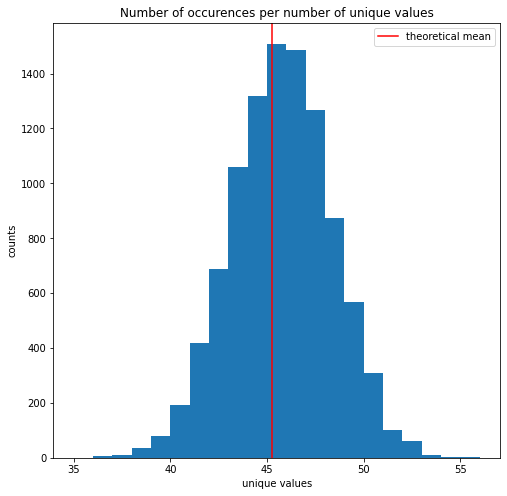

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.hist(values, bins=bins)
ax.axvline(exp_unique_value, c='r', label='theoretical mean')
ax.set_xlabel('unique values')
ax.set_ylabel('counts')
ax.set_title('Number of occurences per number of unique values')
ax.legend()
plt.show()

# Experiment

To probe our theoretical formula, we experiment with different n and N. For a set of random (N, n) pairs (both between 1 and 100,000), we try 30 trials with different random seeds. We save the mean and standard deviation for these 30 trials for each pair of (N, n).

In [6]:
def experiment(num_points, max_value, num_trails):
    # create N and n pairs
    Ns = np.random.randint(0, max_value, num_points)
    ns = np.random.randint(0, max_value, num_points)
    
    # create a matrix to store N,n and the mean and std number of unique values.
    store_matrix_nN = []
    
    for n, N in zip(ns, Ns):
        # create a list to store the number of unique values where the random seeds are different
        unique_list=[]
        
        for i in range(num_trails):
            np.random.seed(i)    
            unique = number_of_unique_values(n, N)
            unique_list.append(unique)
        
        uniq_mean = np.mean(np.array(unique_list))
        uniq_std = np.std(np.array(unique_list))
        
        store_matrix_nN.append([n, N, uniq_mean, uniq_std])
    
    return store_matrix_nN

In [7]:
# generate 100 sets of (N, n)
matrix = experiment(100, 100000, 30)

# Plot the results


In [8]:
from mpl_toolkits.mplot3d import Axes3D

def scatterdata(matrix, ax, fig):
    xdata = np.array(matrix).T[0]
    ydata = np.array(matrix).T[1]
    zdata = np.array(matrix).T[2]
    err = np.array(matrix).T[3] * 100
    
    p = ax.scatter(xdata, ydata, zdata, c=zdata, cmap='viridis', s=30, label='data')
    fig.colorbar(p, ax=ax)
    
    for i in range (100):
        ax.plot([xdata[i], xdata[i]], [ydata[i], ydata[i]], [zdata[i]+err[i], zdata[i]-err[i]], color='black')


def threeDplot(angle1, angle2, fig, position):
    ax = fig.add_subplot(position, projection='3d')
    
    # Data for a three-dimensional line
    xline = np.linspace(1, 100000, 1000)
    yline = np.linspace(1, 100000, 1000)
    
    X, Y = np.meshgrid(xline, yline)
    zline = theoretical_number_of_unique_values(X, Y)
    
    ax.contour3D(xline, yline, zline, 50, cmap='viridis')
    ax.set_xlabel('n', fontsize = 15)
    ax.set_ylabel('N', fontsize = 15)
    ax.set_zlabel('unique values', fontsize = 15)

    scatterdata(matrix, ax, fig)
    
    ax.invert_yaxis()
    ax.view_init(angle1, angle2)
    ax.legend()

Mapping N and n on a plane, our theoretical fomula $z=N(1-(1-\frac{1}{N})^{n})$ is plotted as 3D countours in the plots. The mean values of the 30 trials for each set of (N,n) are scattered on the same plots to see how well the experiment result match the theoretical formula. We also draw the standard deviation for those 30 trials as the error bar on the plot.

For n $\ll$ N the error bars are small because it is unlikely to draw duplicates, so the number of unique values does not vary much. For n $\gg$ N the error bars are also small since there are many more draws than there are unique numbers and each unique number is almost certainly drawn at least once. 

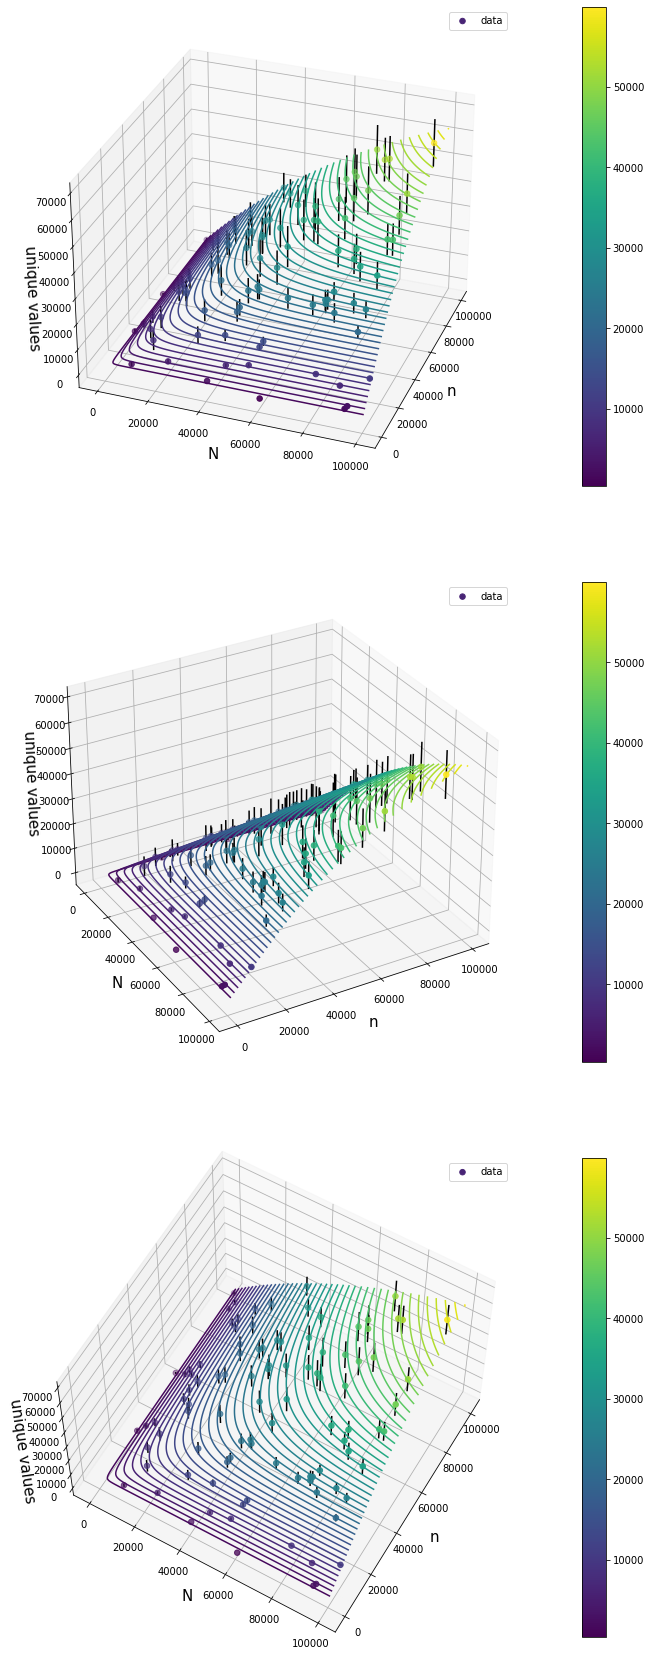

In [9]:
fig= plt.figure(3,figsize=(25, 30))

threeDplot(30,20,fig,311)
threeDplot(30,60,fig,312)
threeDplot(60,30,fig,313)